https://www.irit.fr/~Dominique.Longin/wp-content/uploads/sites/11/2019/11/coursIFI2016-02-LogiqueFloue.pdf

In [1]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

* X axis

In [3]:
start = 0
stop = 10 + 0.001
step = 0.25
x = np.arange(start, stop, step)
print(x)
print(len(x))

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]
41


In [24]:
fig_scale = 3
plt.figure(figsize=(6.4 * fig_scale*20,4.8*fig_scale))

<Figure size 27648x1036.8 with 0 Axes>

<Figure size 27648x1036.8 with 0 Axes>

## Variable Service

In [33]:
# Triangular membership function Service
mauvais = fuzz.trapmf(x,[0,0,2,4])
bon = fuzz.trapmf(x,[3,5,6,8])
excellent = fuzz.trapmf(x,[7,9,10,10])

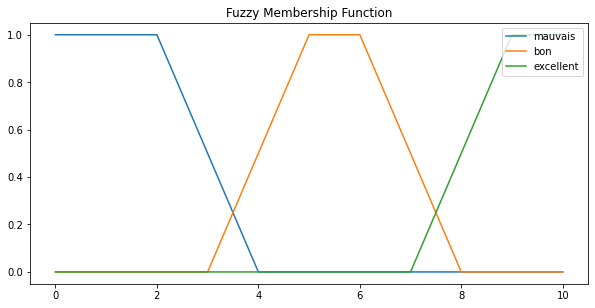

In [34]:
# 3 rows, 1 col, index from 1
plt.figure(figsize=(10,4.8))
plt.title("Fuzzy Membership Function")
plt.plot(x, mauvais, label="mauvais")
plt.plot(x, bon, label="bon")
plt.plot(x, excellent, label="excellent")
plt.legend(loc="upper right")